In [1]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# Shape of training and test patterns
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# **Data Preprocessing**

Now we will scale down all pixel values because the neural network is highly sensitive to large values and for the images, it is obvious to have different values for each pixel. So now below we will scale down all the pixel values.  

In [3]:
# Scaling the pixel values to be between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

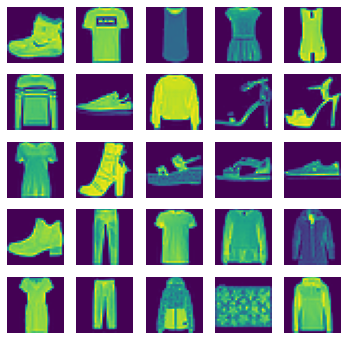

In [4]:
# Visualizing some images
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(5, 5, figsize = (6,6))
axes = axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")

Now before utilizing the above image as it is, we need to color channel. Inherently the images are in greyscale and its corresponding color channel is 1. 

In [5]:
# Reshaping the training and test features
import tensorflow as tf
X_train = tf.reshape(X_train, (-1, 28, 28, 1))
X_test = tf.reshape(X_test, (-1, 28, 28, 1))
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# **Defining and Training the Base CNN model**

In [6]:
# Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

The base model will consist of 3 convolutional layers and 3 dense layers, except for the last dense layer all the neurons of all the layers are fired according to the ReLu activation function. 

In [7]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

By looking at the above summary we have nearly 160k model parameters to be trained and also we can confirm the model layers.

Now let’s compile the base model with loss function and optimizer, the sparse_categorical_crossentropy is the loss function we are using as we have two classes to predict and Adam will be the optimizer which will optimize the loss function.  

In [8]:
# Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

Let’s start training the model, the training will go long for 20 epochs with a batch size of 512. 

In [9]:
# Training the CNN model
cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 20, verbose = 1)

Epoch 1/20
118/118 [==============================] - 53s 440ms/step - loss: 0.9200 - accuracy: 0.6647
Epoch 2/20
118/118 [==============================] - 50s 425ms/step - loss: 0.5514 - accuracy: 0.7976
Epoch 3/20
118/118 [==============================] - 47s 395ms/step - loss: 0.4785 - accuracy: 0.8248
Epoch 4/20
118/118 [==============================] - 46s 388ms/step - loss: 0.4370 - accuracy: 0.8407
Epoch 5/20
118/118 [==============================] - 46s 392ms/step - loss: 0.3927 - accuracy: 0.8570
Epoch 6/20
118/118 [==============================] - 46s 390ms/step - loss: 0.3683 - accuracy: 0.8649
Epoch 7/20
118/118 [==============================] - 46s 391ms/step - loss: 0.3548 - accuracy: 0.8694
Epoch 8/20
118/118 [==============================] - 46s 391ms/step - loss: 0.3289 - accuracy: 0.8800
Epoch 9/20
118/118 [==============================] - 45s 384ms/step - loss: 0.3169 - accuracy: 0.8844
Epoch 10/20
118/118 [==============================] - 46s 388ms/step - l

In order to leverage the trained parameters of the above model for others, we need to save the model. The Below code will save the model parameters. 

In [10]:
# Saving trained CNN model's weights
cnn_model.save('cnn_mnist.h5', save_format='h5')

# **Transfer Learning**

# **Instantiating a new model with old parameters**

Now we will create the new Keras model and will initialize it with parameters of old models that we have saved earlier. 

In [11]:
# Creating new CNN model using previous model's weights
reconstructed_model = keras.models.load_model("/content/cnn_mnist.h5")
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

# **Freezing previous parameters and defining the new model**

In order to utilize the knowledge from the base model, we need to freeze all the layers which means when we train the new model the parameter of the base model will not be updated. Now below we will create the blank sequential model and will add all layers from the base model except the last classifier layer. 

In [12]:
from keras.models import Sequential
cnn2 = Sequential()
# Extract all the layers from the base model except the last layer
for layer in reconstructed_model.layers[:-1]:
  cnn2.add(layer)
# Freeze all the layers of the base model
for layer in cnn2.layers:
  layer.trainable=False

After adding and freezing the layers from the base model we will add a couple of more layers to the new model and lastly one classifier layer. 



In [13]:
# adding new layers 
cnn2.add(Dense(512,activation=('relu'),input_dim=10))
cnn2.add(Dense(256,activation=('relu'))) 
cnn2.add(Dense(128,activation=('relu')))
cnn2.add(Dense(10,activation=('softmax')))
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)       

# **Reading New Dataset (Handwritten MNIST)**

Like an earlier step now we load the MNIST digit dataset here we will read a different dataset popularly known as the MNIST handwritten dataset. After that, we will preprocess it and check a few sample images to understand the dataset. 

11501568/11490434 [==============================] - 0s 0us/step


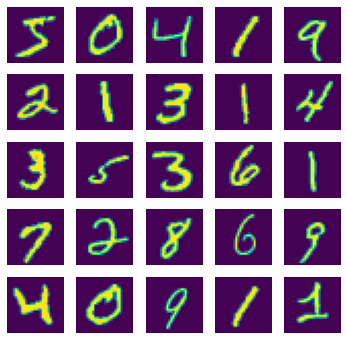

In [14]:
# Handwritten MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scaling the pixel values to be between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255
# Visualizing some images
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(5, 5, figsize = (6,6))
axes = axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")

Below we will add the grey color channel to all the digits images. 

In [15]:
# Reshaping the training and test features
X_train = tf.reshape(X_train, (-1, 28, 28, 1))
X_test = tf.reshape(X_test, (-1, 28, 28, 1))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


# **Training new CNN**

In [16]:
# Compiling the new model
cnn2.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
# Training the new CNN model
cnn2.fit(X_train, y_train, batch_size = 512, epochs = 20, verbose = 1)

Epoch 1/20
118/118 [==============================] - 13s 107ms/step - loss: 0.7729 - accuracy: 0.7507
Epoch 2/20
118/118 [==============================] - 15s 129ms/step - loss: 0.4049 - accuracy: 0.8714
Epoch 3/20
118/118 [==============================] - 16s 137ms/step - loss: 0.3415 - accuracy: 0.8900
Epoch 4/20
118/118 [==============================] - 14s 121ms/step - loss: 0.3007 - accuracy: 0.9041
Epoch 5/20
118/118 [==============================] - 13s 107ms/step - loss: 0.2686 - accuracy: 0.9135
Epoch 6/20
118/118 [==============================] - 13s 106ms/step - loss: 0.2592 - accuracy: 0.9171
Epoch 7/20
118/118 [==============================] - 13s 106ms/step - loss: 0.2397 - accuracy: 0.9232
Epoch 8/20
118/118 [==============================] - 13s 107ms/step - loss: 0.2249 - accuracy: 0.9279
Epoch 9/20
118/118 [==============================] - 13s 106ms/step - loss: 0.2244 - accuracy: 0.9277
Epoch 10/20
118/118 [==============================] - 13s 106ms/step - l

# **Making predictions with the new CNN**

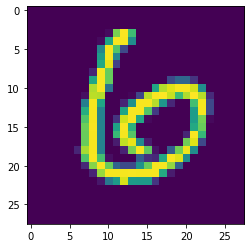

In [17]:
# Random image for testing
import matplotlib.pyplot as plt
actual2 = tf.reshape(X_test[11], (28, 28))
plt.imshow(actual2)

In [18]:
# Predicting class label using new CNN model
import numpy as np
predicted_classes2 = cnn2.predict(X_test)
test_img2 = tf.reshape(X_test[11], (-1, 28, 28, 1))
prediction2 = cnn2.predict(test_img2)
print('Actual label: %d'% y_test[11])
print('Predicted label: %d'% np.argmax(prediction2[0]))

Actual label: 6
Predicted label: 6
